<a href="https://colab.research.google.com/github/drfrostongithub/collab/blob/main/OlahData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: Can I add csv from my google drive to process with python here ?

from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Specify the file path in your Google Drive
file_path = '/content/drive/MyDrive/scrapping-medisa.csv'  # Replace with your actual file path

# Read the CSV file into a pandas DataFrame
try:
  df = pd.read_csv(file_path)
  # Now you can work with the DataFrame 'df'
  print(df.head()) # Example: print first 5 rows
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.EmptyDataError:
  print(f"Error: The file at {file_path} is empty.")
except pd.errors.ParserError:
  print(f"Error: Unable to parse the CSV file at {file_path}. Check its format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                              id_review  \
0   ChZDSUhNMG9nS0VJQ0FnSUNIbjQtVktnEAE   
1  ChdDSUhNMG9nS0VJQ0FnSUR0dWFfTXB3RRAB   
2   ChZDSUhNMG9nS0VJQ0FnSUNwb0wyVkd3EAE   
3   ChZDSUhNMG9nS0VJQ0FnSURoNUwtLWZBEAE   
4   ChZDSUhNMG9nS0VJQ0FnSURCcDhPLVNnEAE   

                                             caption  relative_date  \
0                                                NaN   4 months ago   
1  I want to ask, is there a whitening infusion o...  11 months ago   
2                                The service is good     a year ago   
3                                                NaN     a year ago   
4  Sorry sis. I want to ask about the cost to get...     a year ago   

               retrieval_date  rating             username  n_review_user  \
0  2025-01-24 10:23:13.242595     5.0         Kevin Hutama              0   
1  2025-01-24 10:23:13.242757  

In [ ]:
# Assuming your DataFrame is named 'df' and has a column named 'rating'
low_ratings = df[df['rating'] <= 3]

# Print the number of such ratings
print(f"Number of ratings less than or equal to 3: {len(low_ratings)}")

Number of ratings less than or equal to 3: 11


In [ ]:
# Assuming your DataFrame has a column named 'caption_problems'
# This column should contain descriptions of the problems

# Check if the column exists before using it
if 'caption_problems' in low_ratings.columns:
  # Group by problem and count occurrences
  problem_counts = low_ratings.groupby('caption_problems')['caption_problems'].count()

  # Print the problem counts
  print("Common problems with captions (for ratings <= 3):")
  print(problem_counts)
else:
  print("Column 'caption_problems' not found in the DataFrame.")
  print("Available columns:", low_ratings.columns.tolist()) # Print available columns for debugging

Column 'caption_problems' not found in the DataFrame.
Available columns: ['id_review', 'caption', 'relative_date', 'retrieval_date', 'rating', 'username', 'n_review_user', 'n_photo_user', 'url_user']


In [ ]:
# Assuming your DataFrame is named 'df' and has columns named 'rating' and 'caption'

# Select rows with ratings less than or equal to 3
low_ratings = df[df['rating'] <= 3]

# Get the captions for these low ratings
low_rating_captions = low_ratings['caption']

# Print or analyze the captions
print("Captions for ratings less than or equal to 3:")
for caption in low_rating_captions:
  print(caption)

# Further analysis (e.g., word frequency, sentiment analysis) can be done on low_rating_captions

Captions for ratings less than or equal to 3:
I want to ask, is there a whitening infusion or not?
Sorry for asking, but yes, if you clean the bruntusan, how much does it cost, pls, if you've been to Sono, let me know the price.
Please respond quickly to admin; (I chatted from Friday to Saturday without reply. Even though I used to be a subscriber
nan
It's not suitable, because the place is comfortable
nan
nan
If you want to consult about acne/treatment, how much do you pay?
nan
I have glutax 5gs. How much do you use the injection service here?
nan


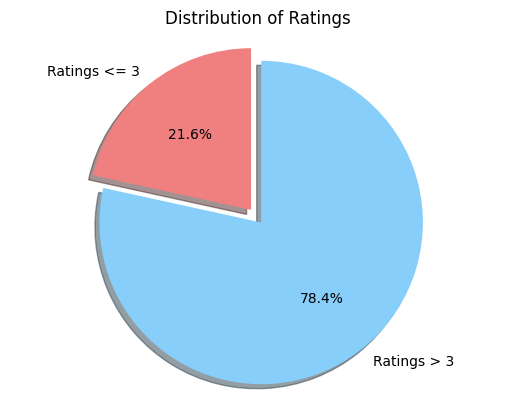

  Rating Category  Count Percentage
0    Ratings <= 3     11      21.6%
1     Ratings > 3     40      78.4%


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df' and has a column named 'rating'

# Calculate low_ratings_count and high_ratings_count
low_ratings_count = len(df[df['rating'] <= 3])  # Count ratings <= 3
high_ratings_count = len(df[df['rating'] > 3])  # Count ratings > 3

# Calculate percentages
total_ratings = low_ratings_count + high_ratings_count
low_ratings_percent = (low_ratings_count / total_ratings) * 100
high_ratings_percent = (high_ratings_count / total_ratings) * 100

# Data for the pie chart
labels = ['Ratings <= 3', 'Ratings > 3']
sizes = [low_ratings_count, high_ratings_count]
colors = ['lightcoral', 'lightskyblue']  # Customize colors if desired
explode = (0.1, 0)  # Explode the first slice (Ratings <= 3)

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

# Add a title
plt.title('Distribution of Ratings')

# Ensure the circle's proportion is correct
plt.axis('equal')

# Display the chart
plt.show()

# Create a table using pandas DataFrame
data = {'Rating Category': ['Ratings <= 3', 'Ratings > 3'],
        'Count': [low_ratings_count, high_ratings_count],
        'Percentage': [f'{low_ratings_percent:.1f}%', f'{high_ratings_percent:.1f}%']}

table = pd.DataFrame(data)
print(table)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# Assuming your DataFrame is named 'df' and has a column named 'rating'
df = pd.read_csv(file_path)
# ... (previous code for pie chart) ...

# Display the overall CSV data in a table
print("\nOverall CSV Data:")

# Set pandas options to display all rows and columns without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# # Display the DataFrame 'df'
# print(df)

# Delete unwanted columns
df = df.drop(columns=['id_review', 'retrieval_date', 'url_user'])

# Delete the 'n_photo_user' column
df = df.drop(columns=['n_photo_user'])


# Limit caption to 20 characters
df['caption'] = df['caption'].str[:25]

# Extract initial from username (assuming username is in a column named 'username')
df['username_initial'] = df['username'].str.split().str[0].str[0] + df['username'].str.split().str[-1].str[0]

# Drop the original 'username' column
df = df.drop(columns=['username'])

# Display the cleaned DataFrame
print("\nCleaned CSV Data:")
print(df)


Overall CSV Data:

Cleaned CSV Data:
                      caption  relative_date  rating  n_review_user  \
0                         NaN   4 months ago     5.0              0   
1   I want to ask, is there a  11 months ago     1.0              0   
2         The service is good     a year ago     4.0              0   
3                         NaN     a year ago     5.0              0   
4   Sorry sis. I want to ask      a year ago     4.0              0   
5   Previously, my face had a     a year ago     5.0              0   
6   My mission, if I may know    2 years ago     5.0              5   
7   Sorry for asking, but yes    2 years ago     1.0              0   
8   Please respond quickly to    2 years ago     1.0              3   
9                         NaN    2 years ago     5.0              0   
10  Is it possible to inject     2 years ago     5.0              0   
11                        NaN    2 years ago     5.0              0   
12                        NaN    2 year

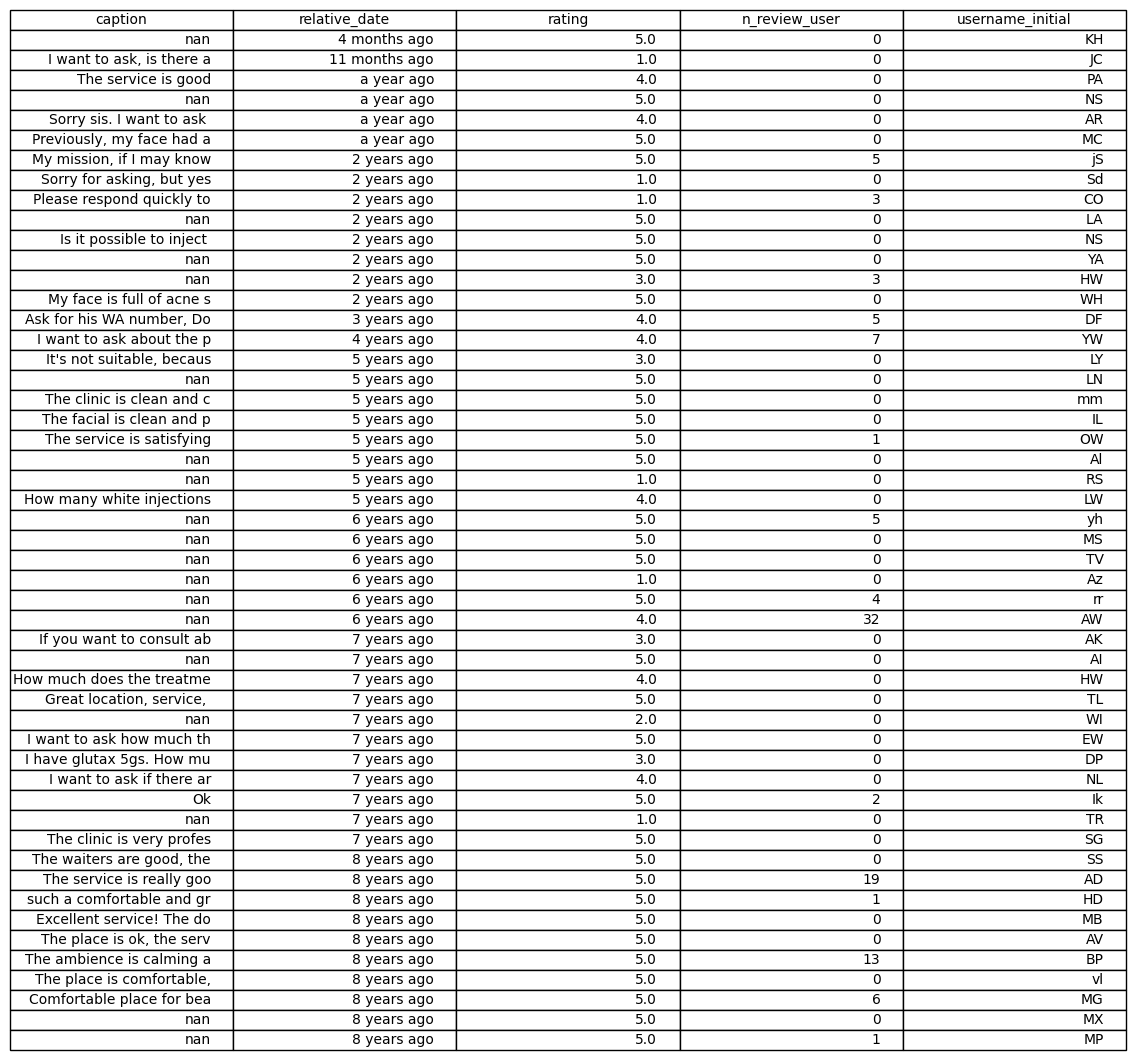

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 4))  # Adjust figsize as needed

# Hide axes
ax.axis('off')

# Display the DataFrame as a table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

# Adjust table properties (optional)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust scaling as needed

# Save the figure as an image
plt.savefig('table.png', bbox_inches='tight', pad_inches=0.1)  # or 'table.jpg'
plt.show()